In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Dataset downloaded from: https://www.kaggle.com/datasets/erdemtaha/cancer-data, original: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [2]:
df = pd.read_csv('Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df[['diagnosis','perimeter_mean','compactness_mean']]

,diagnosis,perimeter_mean,compactness_mean
0,M,122.80,0.27760
1,M,132.90,0.07864
2,M,130.00,0.15990
3,M,77.58,0.28390
4,M,135.10,0.13280
...,...,...,...
564,M,142.00,0.11590
565,M,131.20,0.10340
566,M,108.30,0.10230
567,M,140.10,0.27700


In [4]:
df.shape

(569, 33)

In [5]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df = df.drop(df.columns[32],axis = 1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


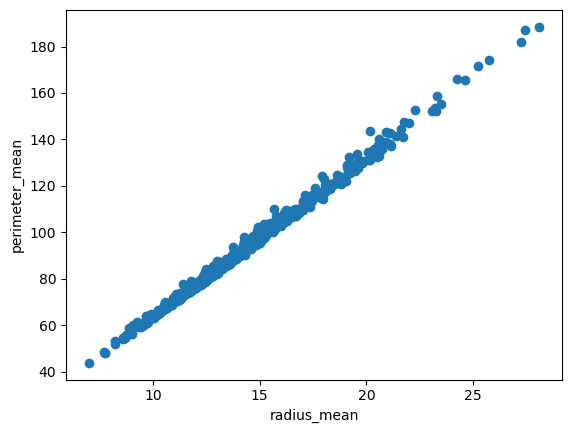

In [7]:
plt.scatter(df['radius_mean'],df['perimeter_mean'])
plt.xlabel('radius_mean')
plt.ylabel('perimeter_mean')
plt.show()

In [22]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 101)

In [23]:
#y column
df_train['y'] = df_train['diagnosis'].replace({'M':1, 'B':0})
df_test['y'] = df_test['diagnosis'].replace({'M':1, 'B':0})

#features matrix
X_train = df_train.drop(['y', 'diagnosis','id'], axis=1)
X_test = df_test.drop(['y', 'diagnosis','id'], axis=1)

#target array
y_train = df_train['y']
y_test = df_test['y']

#scaling training matrix
scaler_training2 = StandardScaler()
scaled_train_expl_vars = scaler_training2.fit_transform(X_train[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']])
X_train[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']] = scaled_train_expl_vars

#scaling test matrix
scaled_test_expl_vars = scaler_training2.transform(X_test[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']])
X_test[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']] = scaled_test_expl_vars


In [49]:
X1_train= X_train[['texture_mean','perimeter_mean','compactness_mean']]
current_mod = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 1000)
current_mod.fit(X1_train,y_train)
scores = cross_val_score(current_mod, X1_train, y_train, scoring='roc_auc')
print("Mean Test Fold AUC:", scores.mean())

Mean Test Fold AUC: 0.974922600619195


In [65]:
pd.DataFrame(current_mod.coef_.T,index = X1_train.columns)

,0
texture_mean,1.176589
perimeter_mean,3.890416
compactness_mean,1.567503


In [69]:
print('Intercept:',current_mod.intercept_.T)

Intercept: [-0.76348401]


In [52]:
X1_train.corr()

,texture_mean,perimeter_mean,compactness_mean
texture_mean,1.000000,0.315231,0.221803
perimeter_mean,0.315231,1.000000,0.543068
compactness_mean,0.221803,0.543068,1.000000


In [54]:
X1_test = X_test[['texture_mean','perimeter_mean','compactness_mean']]
predictive_probs_test = current_mod.predict_proba(X1_test)[:,1]
X1_test['predictive_prob']= predictive_probs_test

C:\Users\napan\AppData\Local\Temp\ipykernel_16812\2322183374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1_test['predictive_prob']= predictive_probs_test


In [55]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr,tpr,color='darkorange', lw=lw, label = 'ROC curve (area ='+str(round(auc,3))+')')
    plt.plot([0,1],[0,1], color='navy', lw=lw,linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = 'lower right')
    plt.show()

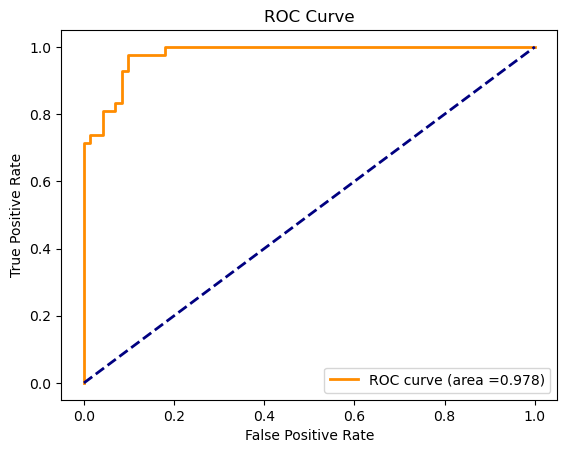

In [56]:
fprs, tprs, thresholds = roc_curve(y_true=y_test, y_score=predictive_probs_test)
auc = roc_auc_score(y_true=y_test, y_score=predictive_probs_test)
plot_roc(fprs, tprs, auc)

In [57]:
auc = roc_auc_score(y_true = y_test,y_score = X1_test['predictive_prob'])
auc

0.9781746031746031

In [58]:
from sklearn.metrics import confusion_matrix
def fpr_tpr_thresh(y,pred_prob,thresh):
    yhat = 1*(pred_prob>= thresh)
    tn,fp,fn,tp = confusion_matrix(y_true=y,y_pred = yhat).ravel()
    tpr = tp/(fn+tp)
    fpr = fp/(fp+tn)
    return pd.DataFrame({'threshold':[thresh],'fpr':[fpr],'tpr':[tpr]})

In [59]:
for thresh in np.arange(0,1.01,.001):
    print(fpr_tpr_thresh(y_test,X1_test['predictive_prob'],thresh))

   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold       fpr  tpr
0      0.001  0.916667  1.0
   threshold       fpr  tpr
0      0.002  0.833333  1.0
   threshold       fpr  tpr
0      0.003  0.791667  1.0
   threshold   fpr  tpr
0      0.004  0.75  1.0
   threshold       fpr  tpr
0      0.005  0.708333  1.0
   threshold       fpr  tpr
0      0.006  0.666667  1.0
   threshold       fpr  tpr
0      0.007  0.638889  1.0
   threshold    fpr  tpr
0      0.008  0.625  1.0
   threshold       fpr  tpr
0      0.009  0.583333  1.0
   threshold       fpr  tpr
0       0.01  0.569444  1.0
   threshold       fpr  tpr
0      0.011  0.541667  1.0
   threshold       fpr  tpr
0      0.012  0.513889  1.0
   threshold  fpr  tpr
0      0.013  0.5  1.0
   threshold       fpr  tpr
0      0.014  0.486111  1.0
   threshold       fpr  tpr
0      0.015  0.458333  1.0
   threshold       fpr  tpr
0      0.016  0.458333  1.0
   threshold       fpr  tpr
0      0.017  0.444444  1.0
   threshold       fpr  tp

   threshold       fpr      tpr
0      0.188  0.138889  0.97619
   threshold       fpr      tpr
0      0.189  0.138889  0.97619
   threshold       fpr      tpr
0       0.19  0.138889  0.97619
   threshold       fpr      tpr
0      0.191  0.138889  0.97619
   threshold       fpr      tpr
0      0.192  0.138889  0.97619
   threshold       fpr      tpr
0      0.193  0.138889  0.97619
   threshold       fpr      tpr
0      0.194  0.138889  0.97619
   threshold       fpr      tpr
0      0.195  0.138889  0.97619
   threshold       fpr      tpr
0      0.196  0.138889  0.97619
   threshold       fpr      tpr
0      0.197  0.138889  0.97619
   threshold       fpr      tpr
0      0.198  0.138889  0.97619
   threshold       fpr      tpr
0      0.199  0.138889  0.97619
   threshold       fpr      tpr
0        0.2  0.138889  0.97619
   threshold       fpr      tpr
0      0.201  0.138889  0.97619
   threshold       fpr      tpr
0      0.202  0.138889  0.97619
   threshold       fpr      tpr
0      0

   threshold       fpr       tpr
0      0.323  0.097222  0.952381
   threshold       fpr       tpr
0      0.324  0.097222  0.952381
   threshold       fpr       tpr
0      0.325  0.097222  0.952381
   threshold       fpr       tpr
0      0.326  0.097222  0.952381
   threshold       fpr       tpr
0      0.327  0.097222  0.952381
   threshold       fpr       tpr
0      0.328  0.097222  0.952381
   threshold       fpr       tpr
0      0.329  0.097222  0.952381
   threshold       fpr       tpr
0       0.33  0.097222  0.952381
   threshold       fpr       tpr
0      0.331  0.097222  0.952381
   threshold       fpr       tpr
0      0.332  0.097222  0.952381
   threshold       fpr       tpr
0      0.333  0.097222  0.952381
   threshold       fpr       tpr
0      0.334  0.097222  0.952381
   threshold       fpr       tpr
0      0.335  0.097222  0.952381
   threshold       fpr       tpr
0      0.336  0.097222  0.952381
   threshold       fpr       tpr
0      0.337  0.097222  0.952381
   thresho

   threshold       fpr       tpr
0      0.451  0.069444  0.833333
   threshold       fpr       tpr
0      0.452  0.069444  0.833333
   threshold       fpr       tpr
0      0.453  0.069444  0.833333
   threshold       fpr       tpr
0      0.454  0.069444  0.833333
   threshold       fpr       tpr
0      0.455  0.069444  0.833333
   threshold       fpr       tpr
0      0.456  0.069444  0.833333
   threshold       fpr       tpr
0      0.457  0.069444  0.833333
   threshold       fpr       tpr
0      0.458  0.069444  0.833333
   threshold       fpr       tpr
0      0.459  0.069444  0.833333
   threshold       fpr       tpr
0       0.46  0.069444  0.833333
   threshold       fpr       tpr
0      0.461  0.069444  0.833333
   threshold       fpr       tpr
0      0.462  0.069444  0.833333
   threshold       fpr       tpr
0      0.463  0.069444  0.833333
   threshold       fpr       tpr
0      0.464  0.069444  0.833333
   threshold       fpr       tpr
0      0.465  0.069444  0.833333
   thresho

   threshold       fpr       tpr
0      0.619  0.055556  0.809524
   threshold       fpr       tpr
0       0.62  0.055556  0.809524
   threshold       fpr       tpr
0      0.621  0.055556  0.809524
   threshold       fpr       tpr
0      0.622  0.055556  0.809524
   threshold       fpr       tpr
0      0.623  0.055556  0.809524
   threshold       fpr       tpr
0      0.624  0.055556  0.809524
   threshold       fpr       tpr
0      0.625  0.055556  0.809524
   threshold       fpr       tpr
0      0.626  0.055556  0.809524
   threshold       fpr       tpr
0      0.627  0.055556  0.809524
   threshold       fpr       tpr
0      0.628  0.055556  0.809524
   threshold       fpr       tpr
0      0.629  0.055556  0.809524
   threshold       fpr       tpr
0       0.63  0.055556  0.809524
   threshold       fpr       tpr
0      0.631  0.055556  0.809524
   threshold       fpr       tpr
0      0.632  0.055556  0.809524
   threshold       fpr       tpr
0      0.633  0.055556  0.809524
   thresho

   threshold       fpr       tpr
0      0.754  0.041667  0.785714
   threshold       fpr       tpr
0      0.755  0.041667  0.785714
   threshold       fpr       tpr
0      0.756  0.041667  0.785714
   threshold       fpr       tpr
0      0.757  0.041667  0.785714
   threshold       fpr       tpr
0      0.758  0.041667  0.785714
   threshold       fpr       tpr
0      0.759  0.041667  0.785714
   threshold       fpr       tpr
0       0.76  0.041667  0.785714
   threshold       fpr       tpr
0      0.761  0.041667  0.785714
   threshold       fpr       tpr
0      0.762  0.041667  0.785714
   threshold       fpr       tpr
0      0.763  0.041667  0.785714
   threshold       fpr       tpr
0      0.764  0.041667  0.785714
   threshold       fpr       tpr
0      0.765  0.041667  0.785714
   threshold       fpr       tpr
0      0.766  0.041667  0.785714
   threshold       fpr       tpr
0      0.767  0.041667  0.785714
   threshold       fpr       tpr
0      0.768  0.041667  0.785714
   thresho

   threshold  fpr       tpr
0      0.904  0.0  0.690476
   threshold  fpr       tpr
0      0.905  0.0  0.690476
   threshold  fpr       tpr
0      0.906  0.0  0.690476
   threshold  fpr       tpr
0      0.907  0.0  0.690476
   threshold  fpr       tpr
0      0.908  0.0  0.690476
   threshold  fpr       tpr
0      0.909  0.0  0.690476
   threshold  fpr       tpr
0       0.91  0.0  0.690476
   threshold  fpr       tpr
0      0.911  0.0  0.690476
   threshold  fpr       tpr
0      0.912  0.0  0.690476
   threshold  fpr       tpr
0      0.913  0.0  0.690476
   threshold  fpr       tpr
0      0.914  0.0  0.690476
   threshold  fpr       tpr
0      0.915  0.0  0.690476
   threshold  fpr       tpr
0      0.916  0.0  0.690476
   threshold  fpr       tpr
0      0.917  0.0  0.690476
   threshold  fpr       tpr
0      0.918  0.0  0.690476
   threshold  fpr       tpr
0      0.919  0.0  0.690476
   threshold  fpr       tpr
0       0.92  0.0  0.690476
   threshold  fpr       tpr
0      0.921  0.0  0

$probability = \frac{1}{1+e^{-(-0.76348401 + 1.176589texture_mean + 3.890416perimeter_mean + 1.567503compactness_mean)}}$